# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

#Import Library

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [28]:
#TODO
df = pd.read_csv('bank-full.csv',delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#Normalize data
normalize numerical data.

In [29]:
# Normalize numerical data

y_df = df['y']
X_df = df.drop(columns=['y'])
numerical_indices = X_df.select_dtypes(include = np.number).columns

for col in X_df.columns:
    if col in numerical_indices:
        X_df[col] = X_df[col].fillna(X_df[col].mean())
    else:
        X_df[col] = X_df[col].fillna(X_df[col].mode()[0])

scaler = StandardScaler()
X_df[numerical_indices] = scaler.fit_transform(X_df[numerical_indices])

In [30]:

encoder = LabelEncoder()
categorical_indices = []
for col in X_df.columns:
    if col not in numerical_indices: 
        X_df[col] = encoder.fit_transform(X_df[col])
        categorical_indices.append(col) 

#encoded_df = pd.get_dummies(scaled_df, columns=categorical_indices, drop_first=True, dtype='int')

y_df = y_df.map({'no':0,'yes':1})#.fillna(ydf)#.infer_objects(copy = False)

X_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.251940,3
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.251940,3
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.251940,3
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.251940,3
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.251940,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,9,1,2,0,-0.176460,0,0,0,0.143418,9,2.791329,0.076230,-0.411453,-0.251940,3
45207,2.831227,5,0,0,0,0.120447,0,0,0,0.143418,9,0.768224,-0.246560,-0.411453,-0.251940,3
45208,2.925401,5,1,1,0,1.429593,0,0,0,0.143418,9,3.373797,0.721811,1.436189,1.050473,2
45209,1.512791,1,1,1,0,-0.228024,0,0,1,0.143418,9,0.970146,0.399020,-0.411453,-0.251940,3


In [31]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_df, y_df, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create Data Loader
create data loader for pytorch

In [32]:
device = 'cpu'
# (
#     "cuda"
#     if torch.cuda.is_available()
#     else "mps"
#     if torch.backends.mps.is_available()
#     else "cpu"
# )
print(f"Using {device} device")

Using cpu device


In [33]:
#TODO

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create dataloaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


#Model
define your model in here

In [34]:
class BankMarketingNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(16, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid(), # sometimes we dont need this (and I think the criterion will provide) but we need it for BCE loss
        )
    def forward(self, x):
        return self.linear_relu_stack(x)
        # out = self.linear_relu_stack(x)
        # return torch.sigmoid(out)
        

#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [35]:
#TODO
model = BankMarketingNet()#.to(device)
#print(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)
print(model)

BankMarketingNet(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=16, out_features=8, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=8, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [36]:
def train_loop(dataloader, model, criterion, optimizer):
    size = len(dataloader.dataset)
    epoch_loss , correct = 0 , 0
    model.train()
    for batch, (X, y) in enumerate(dataloader):
       # X = X.to(device)
      #  y = y.to(device)
        pred = model(X)
        loss = criterion(pred, y.unsqueeze(1))
        correct +=  (torch.max(pred, 1)[1] == y).sum().item() #torch.sum(torch.sign(pred - 0.5) == y).item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        epoch_loss += loss.item()
    return epoch_loss /len(dataloader) , 100 * correct/ size
        
def test_loop(dataloader, model, criterion):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
           # X = X.to(device)
           # y = y.to(device)
            pred = model(X)
            test_loss += criterion(pred, y.unsqueeze(1)).item()
            correct +=  (torch.max(pred, 1)[1] == y).sum().item()
    return  test_loss / len(dataloader) , 100 * correct / size
    

In [37]:

epochs = 20
train_losses = []
val_losses = []
for t in range(epochs):
    print(f"Epoch {t+1}:")
    train_loss , accuracy = train_loop(train_loader, model, criterion, optimizer)
    print(f'train_loss:{train_loss}'  , f'accuracy:{accuracy}')
    train_losses.append(train_loss)
    val_loss, accuracy = test_loop(val_loader, model, criterion)
    print(f'val_loss:{val_loss}', f'accuracy:{accuracy}')
    val_losses.append(val_loss)
    print("--------------------------------")

Epoch 1:


train_loss:0.30314630206787224 accuracy:88.33696716908396
val_loss:0.25860600946646817 accuracy:87.89442642288411
--------------------------------
Epoch 2:
train_loss:0.24781288054555353 accuracy:88.33696716908396
val_loss:0.2516155999224141 accuracy:87.89442642288411
--------------------------------
Epoch 3:
train_loss:0.23832374347580804 accuracy:88.33696716908396
val_loss:0.24802043921542619 accuracy:87.89442642288411
--------------------------------
Epoch 4:
train_loss:0.2342521880612229 accuracy:88.33696716908396
val_loss:0.24300024974739776 accuracy:87.89442642288411
--------------------------------
Epoch 5:
train_loss:0.23286515460772947 accuracy:88.33696716908396
val_loss:0.24343375461000316 accuracy:87.89442642288411
--------------------------------
Epoch 6:
train_loss:0.230681741207537 accuracy:88.33696716908396
val_loss:0.24160322462612727 accuracy:87.89442642288411
--------------------------------
Epoch 7:
train_loss:0.2306063573468815 accuracy:88.33696716908396
val_loss:0.

### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

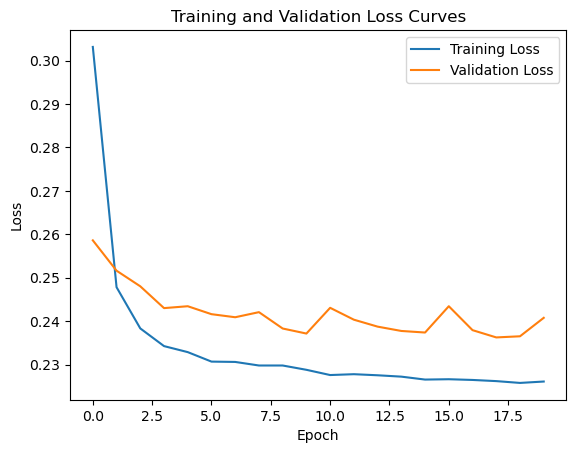

In [38]:
#TODO
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [39]:
#TODO

test_loss, accuracy = test_loop(test_loader, model, criterion)
print("loss",test_loss,"accuracy", accuracy)


loss 0.2304395946832198 accuracy 88.54320259510469
